This notebook produces analysis of common genes between Alzheimer's and Parkinson's. In addition, various attempts at exploration between the two diseases are made based on the processed datasets of Harmonizome.

In [1]:
import pandas as pd

DIGINET is a database that has all the annotations between various genes and diseases through literature text mining. List of the externally validated genes are:

In [2]:
diginet_ = pd.read_csv("E:/shortlisted-diseases Maayan lab/genomics-gwas/parkinson-genes-GWAS_DIGINET.csv")
list_of_validated_genes = list(diginet_['Gene'])
len(list_of_validated_genes)

1966

Harmonizome has another dataset which consists of only GWAS based disease studies and collects gene-disease associations where the normalized value refers to how much a gene has been associated with the disease in a population.

In [2]:
gwas_collected_genes = pd.read_csv("E:\shortlisted-diseases Maayan lab\genomics-gwas\ibd-genes.csv")
list_gwas = gwas_collected_genes['Gene']
len(list_gwas)


gwas_collected_genes

,Unnamed: 0,Gene,std_values
0,0,EDN3,0.197766
1,1,LSP1,0.724323
2,2,FIBP,0.682635
3,3,AKAP11,0.661797
4,4,IL17REL,0.368757
...,...,...,...
316,316,HOXA13,0.486425
317,317,AUH,0.572184
318,318,RSPO2,0.157710
319,319,PHOX2B,0.368757


Calculating the number of genes present in the GWAS dataset that have been externally implicated as well in DIGINET:

In [68]:
sum = 0
validated_genes_through_GWAS = []
for gene in list_of_validated_genes:
    if gene in list(list_gwas):
        validated_genes_through_GWAS.append(gene)

len(validated_genes_through_GWAS)

435

To explore how the distribution of these processed values look like, we generate a histogram plot. As we can see, most of the genes show a normalized variant value of 0.5 whereas a very low number of genes show a high number. 

     Unnamed: 0     Gene  std_values
0             0     EDN3    0.197766
1             1     LSP1    0.724323
2             2     FIBP    0.682635
3             3   AKAP11    0.661797
4             4  IL17REL    0.368757
..          ...      ...         ...
316         316   HOXA13    0.486425
317         317      AUH    0.572184
318         318    RSPO2    0.157710
319         319   PHOX2B    0.368757
320         320  RASGRP1    0.572184

[321 rows x 3 columns]


<Axes: ylabel='Count'>

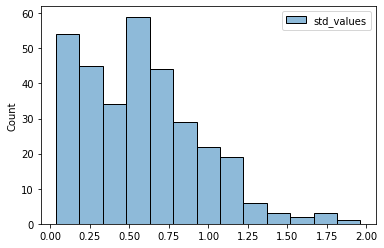

In [20]:
gwas_collected_genes
import seaborn as sns
print(gwas_collected_genes)
sns.histplot(gwas_collected_genes[['Gene', 'std_values']])

In [49]:
gwas_collected_genes_alz = pd.read_csv("E:\shortlisted-diseases Maayan lab\genomics-gwas\obesity_revised.csv")
gwas_collected_genes_alz

,Unnamed: 0,Gene,std_values
0,0,OR7G1,0.889594
1,1,TKT,0.784108
2,2,FBN2,1.075990
3,3,PANK4,1.048460
4,4,APOE,2.646110
...,...,...,...
2071,2071,CEP128,0.789545
2072,2072,EHF,1.075990
2073,2073,PODXL,0.830304
2074,2074,SEMA5A,1.241940


In [50]:
gwas_t2d = pd.read_csv("E:/shortlisted-diseases Maayan lab/genomics-gwas/T2D_revised.csv")
merged = gwas_t2d.merge(gwas_collected_genes_alz, on="Gene")[['Gene', 'std_values_x', 'std_values_y']]
merged

,Gene,std_values_x,std_values_y
0,SPOCK1,1.242890,1.242890
1,TMEM181,0.680104,0.680104
2,GRIA3,0.759585,0.759585
3,IL7R,0.617420,0.503016
4,CSRNP3,0.630986,0.630986
...,...,...,...
1027,MAML3,0.811977,0.811977
1028,TRAPPC9,0.647686,1.107640
1029,EPB41L2,0.687839,0.687839
1030,ARHGAP26,0.920453,0.673994


Some of the values were being the same in the two datasets. Thus, they were removed since the values were same and those genes were doubtful. 

In [51]:
value_list_1 = list(merged['std_values_x'])
value_list_2 = list(merged['std_values_y'])
genes = list(merged['Gene'])
equal_values = []
for x,y,z in zip(value_list_1, value_list_2, genes):
    if x == y:
        equal_values.append(z)
gwas_t2d = gwas_t2d.set_index('Gene')
gwas_ob = gwas_collected_genes_alz.set_index("Gene")
gwas_t2d = gwas_t2d.drop(equal_values)
gwas_ob = gwas_ob.drop(equal_values)

gwas_t2d.to_csv("E:/shortlisted-diseases Maayan lab/genomics-gwas/T2D_revised_without_any_duplicates.csv")
gwas_ob.to_csv("E:/shortlisted-diseases Maayan lab/genomics-gwas/obesity_revised_without_any_duplicates.csv")

Visualising the histogram plots:

<Axes: ylabel='Count'>

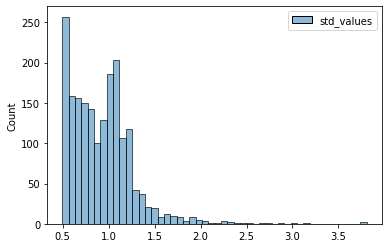

In [56]:
import seaborn as sns
gwas_t2d = pd.read_csv("E:/shortlisted-diseases Maayan lab/genomics-gwas/T2D_revised_without_any_duplicates.csv")
gwas_ob = pd.read_csv("E:/shortlisted-diseases Maayan lab/genomics-gwas/obesity_revised_without_any_duplicates.csv")
sns.histplot(gwas_ob[['Gene', 'std_values']])

We found a higher number of genes associated with Alzheimer's as compared to Parkinson's in the literature.

<Axes: xlabel='std_values_OBS', ylabel='std_values_T2D'>

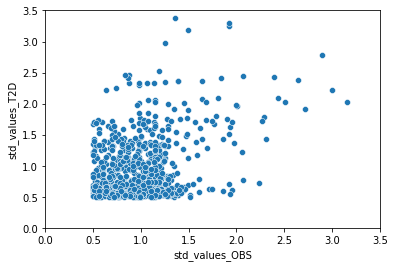

In [60]:
import matplotlib.pyplot as plt

merged_df = gwas_ob.merge(gwas_t2d, how="inner", on="Gene")
merged_df = merged_df[['Gene', 'std_values_x', 'std_values_y']]
merged_df.columns = ['Gene', 'std_values_OBS', 'std_values_T2D']
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
sns.scatterplot(x= merged_df['std_values_OBS'], y=merged_df['std_values_T2D'])

Violin plots to observe the distribution shape better:

<Axes: xlabel='std_values_ALZ'>

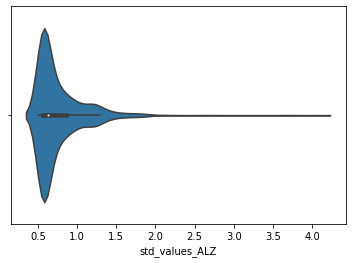

In [9]:
sns.violinplot(x= gwas_collected_genes_alz['std_values_ALZ'])

<Axes: xlabel='std_values_PARK'>

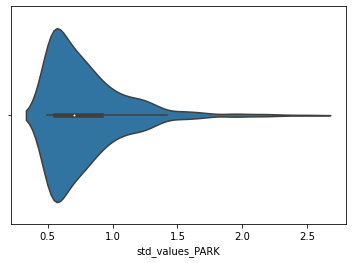

In [10]:
sns.violinplot(x= gwas_collected_genes['std_values_PARK'])

In [55]:
validated_genes_through_GWAS_merged = []
for gene in list_of_validated_genes: # validated genes of DIGINET of Parkinson's
    if gene in list(merged_df.index):
        validated_genes_through_GWAS_merged.append(gene)

len(validated_genes_through_GWAS_merged)

48

Performing a Rank-sum Wilcoxon statistical test for the common genes between obesity versus T2D and Parkinson's versus Alzheimer's: 

In [62]:
import scipy

scipy.stats.ranksums(x= merged_df['std_values_OBS'], y=merged_df['std_values_T2D'])
merged_df = merged_df[['Gene', 'std_values_OBS', 'std_values_T2D']]


merged_df = merged_df.set_index('Gene')

Heatmap showing the normalized values of genetic variants:

That is, higher a value, higher its association with the disease.

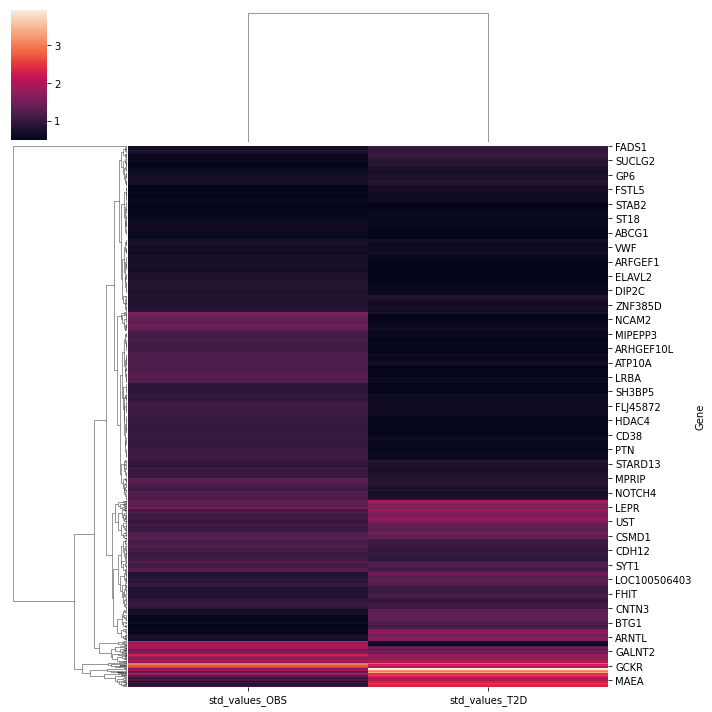

In [63]:
import numpy as np

h = sns.clustermap(merged_df)
dendro = h.dendrogram_row.dendrogram

D = np.array(dendro['dcoord'])
I = np.array(dendro['icoord'])

Ordered the dataframe using my clustermap: 

In [21]:
def extract_clustered_table(res, data):
    """
    input
    =====
    res:     <sns.matrix.ClusterGrid>  the clustermap object
    data:    <pd.DataFrame>            input table
    
    output
    ======
    returns: <pd.DataFrame>            reordered input table
    """
    
    # if sns.clustermap is run with row_cluster=False:
    if res.dendrogram_row is None:
        print("Apparently, rows were not clustered.")
        return -1
    
    if res.dendrogram_col is not None:
        # reordering index and columns
        new_cols = data.columns[res.dendrogram_col.reordered_ind]
        new_ind = data.index[res.dendrogram_row.reordered_ind]
        
        return data.loc[new_ind, new_cols]
    
    else:
        # reordering the index
        new_ind = data.index[res.dendrogram_row.reordered_ind]

        return data.loc[new_ind,:]

In [22]:
ordered = extract_clustered_table(h, merged_df)
ordered

NameError: name 'h' is not defined

Performing a Gene Set enrichment analysis test for each of the gene lists belonging to various diseases:

<Axes: title={'center': 'KEGG_2021_Human'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

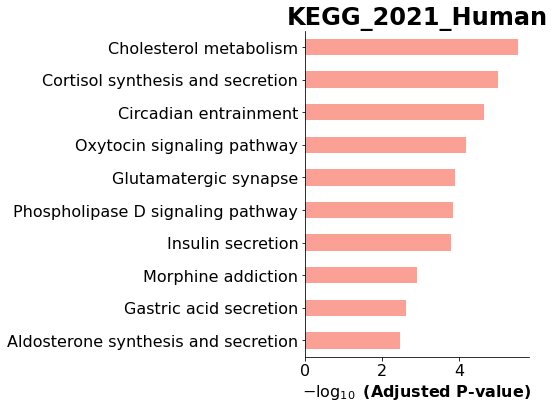

In [64]:
import gseapy

glist = list(gwas_ob['Gene'])

enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets="KEGG_2021_Human")

gseapy.barplot(enr_res.res2d,title='KEGG_2021_Human')


3211


<Axes: title={'center': 'KEGG_2021_Human'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

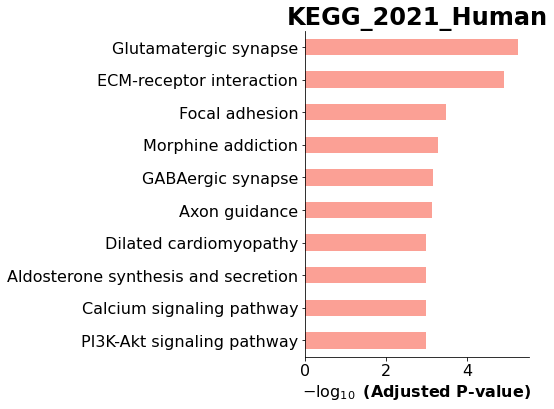

In [65]:
glist = list(gwas_t2d['Gene'])
print(len(glist))
enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets="KEGG_2021_Human")

gseapy.barplot(enr_res.res2d,title='KEGG_2021_Human')

202


<Axes: title={'center': 'KEGG_2021_Human'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

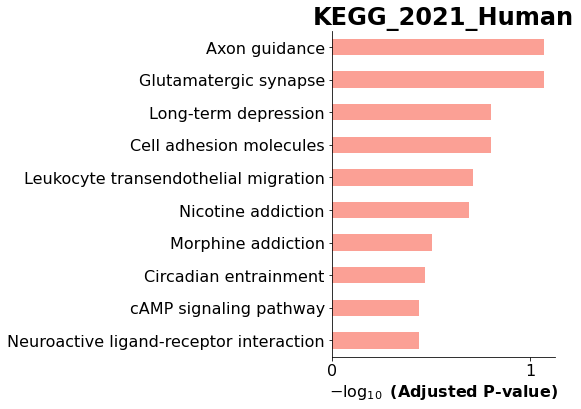

In [57]:
glist = list(merged_df.index)
print(len(glist))
enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets="KEGG_2021_Human", cutoff=0.5)

gseapy.barplot(enr_res.res2d,title= 'KEGG_2021_Human', cutoff=0.5)

48


<Axes: title={'center': 'KEGG_2021_Human'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

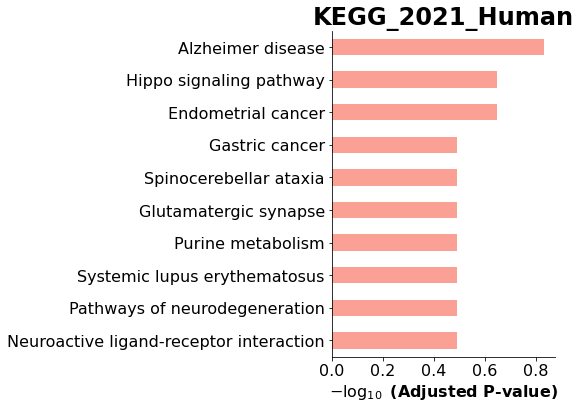

In [62]:
glist = validated_genes_through_GWAS_merged
print(len(glist))

enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets="KEGG_2021_Human", cutoff=0.5)

gseapy.barplot(enr_res.res2d,title='KEGG_2021_Human', cutoff=0.5)

Similar analysis for T2D, obesity and IBD

In [66]:
diginet_T2D = pd.read_csv("E:\shortlisted-diseases Maayan lab\genomics-gwas/t2d-genes-GWAS.csv")
diginet_T2D

,Gene,std_values_t2d,Entrez_t2d
0,FAM163A,0.570595,148753.0
1,MED27,0.938237,9442.0
2,TIMP2,1.877070,7077.0
3,NSUN2,0.532016,54888.0
4,UGT1A10,2.138340,54575.0
...,...,...,...
3376,TP53INP1,1.509060,79888.0
3377,LCORL,1.596090,94241.0
3378,PBLD,0.703692,254251.0
3379,KIAA1211,0.546610,64081.0


An UpSet plot containing all the common and unique genes:

In [38]:
from upsetplot import plot
import pandas as pd

df_1 = pd.read_csv("E:\shortlisted-diseases Maayan lab\genomics-gwas\ibd-genes.csv")
df_2 = pd.read_csv("E:\shortlisted-diseases Maayan lab\genomics-gwas/alzheimer-genes-GWAS.csv")
df_3 = pd.read_csv("E:/shortlisted-diseases Maayan lab/genomics-gwas/T2D_revised_without_any_duplicates.csv")
df_4 = pd.read_csv("E:\shortlisted-diseases Maayan lab\genomics-gwas\parkinsons-genes-GWAS.csv")
df_5 = pd.read_csv("E:/shortlisted-diseases Maayan lab/genomics-gwas/obesity_revised_without_any_duplicates.csv")

In [67]:
set1 = set(df_1['Gene'])
set2 = set(df_2['Gene'])
set3 = set(df_3['Gene'])
set4 = set(df_4['Gene'])
set5 = set(df_5['Gene'])
set_names = ["IBD", "ALZ", "T2D", "PARK", "OBS"]


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

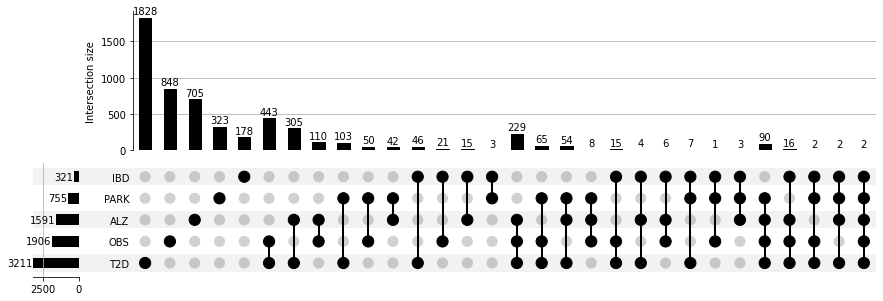

In [68]:
all_elems = set1.union(set2).union(set3).union(set4).union(set5)
df_new = pd.DataFrame([[e in set1, e in set2, e in set3, e in set4, e in set5] for e in all_elems], columns = set_names)
df_up = df_new.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts = True)


Generating a heatmap containing all the genes for all the diseases:

In [85]:
merged = df_1.merge(df_2, on="Gene", how="inner").merge(df_3, on="Gene", how="inner").merge(df_4, on="Gene", how="inner").merge(df_5, on="Gene", how="inner")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19872\4125460149.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x', 'std_values_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged = df_1.merge(df_2, on="Gene", how="inner").merge(df_3, on="Gene", how="inner").merge(df_4, on="Gene", how="inner").merge(df_5, on="Gene", how="inner")


In [86]:
merged = merged.fillna(0)
merged = merged.set_index('Gene')

In [87]:
merged = merged.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [88]:
merged = merged.drop(['Entrez_PARK'], axis=1)

In [89]:
merged

,std_values_x,std_values_y,std_values_x,std_values_PARK,std_values_y
Gene,,,,,
MAML2,0.524610,0.721383,1.19171,0.585152,1.14463
NELL1,0.311576,0.673322,1.38210,0.741877,1.09373


In [82]:
merged.columns = ['IBD', 'ALZ', 'T2D', 'PARK', 'OBS']

C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


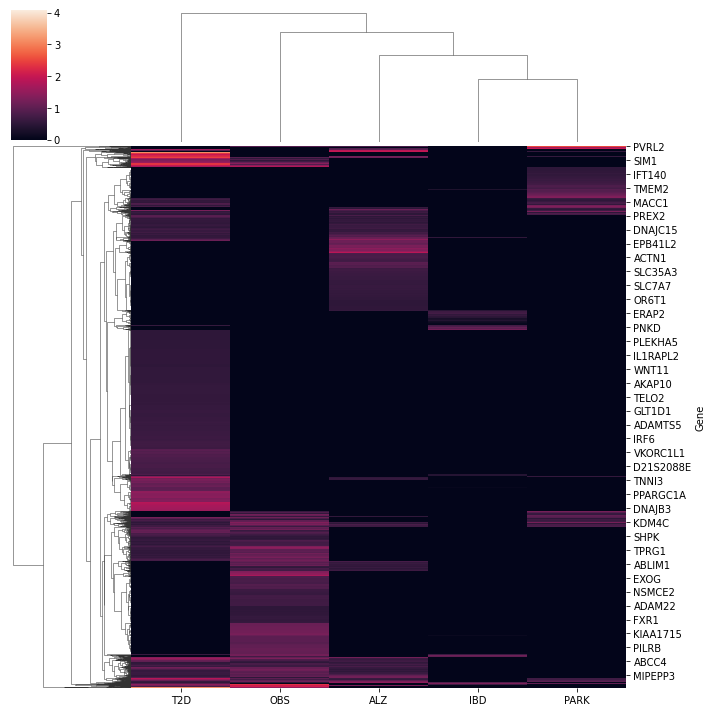

In [83]:
h = sns.clustermap(merged)
dendro = h.dendrogram_row.dendrogram

D = np.array(dendro['dcoord'])
I = np.array(dendro['icoord'])

## Transcriptomics

In [58]:
ob_T = pd.read_csv("E:\Transcriptomics\Obesity\FINAL-transcripts/all the gse.csv")
t2d_T = pd.read_csv("E:\Transcriptomics\T2D\Final-transcripts/both the GSE.csv")
ibd_T = pd.read_csv("E:\Transcriptomics\IBD\ibd-transcript.csv")
alz_T = pd.read_csv("E:\Transcriptomics\Alzheimer's\GSE122063.top.table.csv")
park_T = pd.read_csv("E:\Transcriptomics\Park\Final-transcripts/all-the-GSE.csv")

In [14]:
alz_T = alz_T.drop_duplicates('Gene.symbol')
park_T = park_T.drop_duplicates('Gene.symbol')
alz_T

,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,GENE_NAME,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.360000e-16,4.990000e-21,11.90,37.114109,1.937365,SPP1,secreted phosphoprotein 1,NaN,NaN,NaN,NaN
2,1.360000e-16,6.970000e-21,11.90,36.792197,1.599127,CHST6,carbohydrate (N-acetylglucosamine 6-O) sulfotr...,NaN,NaN,NaN,NaN
8,3.730000e-16,6.270000e-20,-11.40,34.668865,-1.336824,CIRBP,cold inducible RNA binding protein,NaN,NaN,NaN,NaN
9,3.730000e-16,6.500000e-20,-11.40,34.634611,-0.899630,TRAPPC2L,trafficking protein particle complex 2-like,NaN,NaN,NaN,NaN
11,3.730000e-16,7.620000e-20,-11.40,34.480691,-1.675652,SPON2,spondin 2,extracellular matrix protein,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2625,9.770000e-07,4.370000e-08,-5.92,8.263034,-1.314369,CITED1,Cbp/p300-interacting transactivator,with Glu/Asp-rich carboxy-terminal domain,1,NaN,NaN
2626,9.810000e-07,4.390000e-08,5.92,8.259125,1.022935,XLOC_004512,NaN,NaN,NaN,NaN,NaN
2627,9.830000e-07,4.400000e-08,-5.92,8.256858,-0.883357,ZNF215,zinc finger protein 215,NaN,NaN,NaN,NaN
2632,9.880000e-07,4.430000e-08,-5.92,8.250386,-0.702451,WFDC2,WAP four-disulfide core domain 2,NaN,NaN,NaN,NaN


Index(['GeneID', 'padj', 'pvalue', 'lfcSE', 'stat', 'log2FoldChange',
       'baseMean', 'Gene.symbol', 'Description'],
      dtype='object')


<Axes: ylabel='Count'>

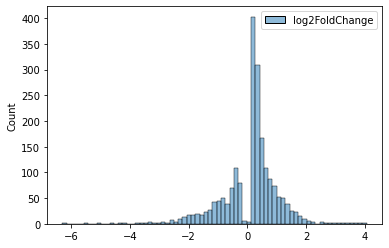

In [35]:
import seaborn as sns

t2d_T = t2d_T.drop_duplicates('Gene.symbol')
print(t2d_T.columns)
sns.histplot(t2d_T[['Gene.symbol', 'log2FoldChange']])

In [64]:
t2d_T = t2d_T.drop_duplicates('Gene.symbol')
park_T = park_T.drop_duplicates('Gene.symbol')

merged_df_transcript = park_T.merge(t2d_T, on= 'Gene.symbol')
merged_df_transcript = merged_df_transcript.dropna(axis=1, how="all")
merged_df_transcript

,Unnamed: 0,adj.P.Val,P.Value,logFC,Gene.symbol,Gene.title,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,GeneID,padj,pvalue,lfcSE,stat,log2FoldChange,baseMean,Description
0,NaN,0.000650,2.610000e-07,-0.225000,RHOG,ras homolog family member G,NaN,NaN,NaN,NaN,391,0.011400,0.000093,0.1244,-3.907894,-0.486228,292.45,ras homolog family member G
1,NaN,0.001324,1.120000e-06,-0.219000,PILRA,paired immunoglobin like type 2 receptor alpha,NaN,NaN,NaN,NaN,29992,0.046600,0.002630,0.1371,-3.007959,-0.412264,169.85,paired immunoglobin like type 2 receptor alpha
2,NaN,0.001627,1.930000e-06,-0.203000,HELZ2,helicase with zinc finger 2,NaN,NaN,NaN,NaN,85441,0.766884,0.042700,0.3478,-2.026387,-0.704835,865.74,helicase with zinc finger 2
3,NaN,0.002009,3.280000e-06,-0.215000,DGAT2,diacylglycerol O-acyltransferase 2,NaN,NaN,NaN,NaN,84649,0.006758,0.000007,0.4873,4.493862,2.190052,7618.28,diacylglycerol O-acyltransferase 2
4,NaN,0.002057,3.720000e-06,-0.189000,S100A11,S100 calcium binding protein A11,NaN,NaN,NaN,NaN,6282,0.024000,0.000483,0.1491,-3.489795,-0.520195,279.77,S100 calcium binding protein A11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,0.036100,9.971200e-03,0.714020,SIRT1,NaN,NaN,NaN,NaN,NaN,23411,0.035800,0.001240,0.0549,3.230072,0.177297,399.89,sirtuin 1
102,NaN,0.036500,1.018620e-02,0.630639,KIF3A,NaN,NaN,NaN,NaN,NaN,11127,0.611119,0.016500,0.2070,-2.397482,-0.496377,226.45,kinesin family member 3A
103,NaN,0.039300,1.126280e-02,0.859138,CNR1,NaN,NaN,NaN,NaN,NaN,1268,0.743612,0.034400,0.4152,-2.115382,-0.878225,103.62,cannabinoid receptor 1
104,NaN,0.044200,1.371880e-02,0.814248,IDH1,NaN,NaN,NaN,NaN,NaN,3417,0.659130,0.019900,0.3332,2.327854,0.775637,6272.90,isocitrate dehydrogenase (NADP(+)) 1


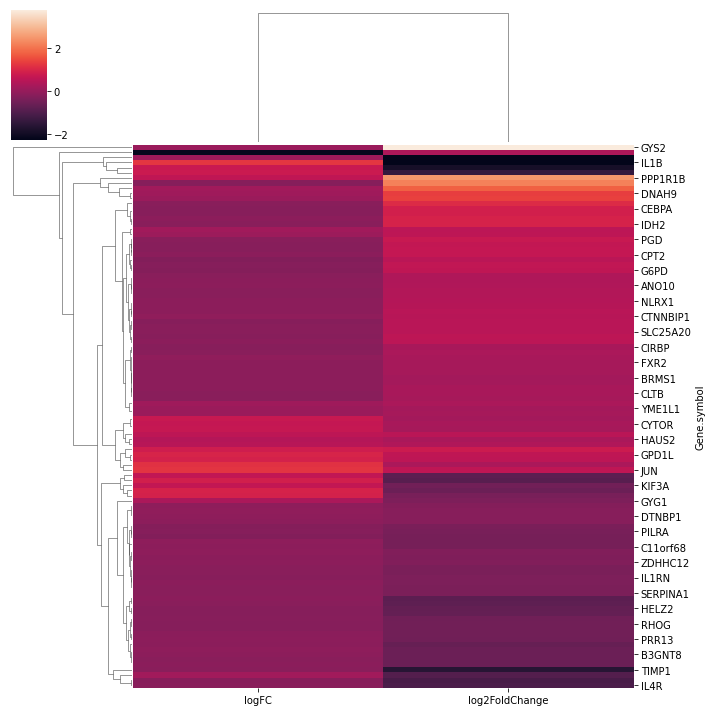

In [65]:
merged = merged_df_transcript[['Gene.symbol', 'logFC', 'log2FoldChange']]
merged = merged.set_index('Gene.symbol')
h = sns.clustermap(merged)
dendro = h.dendrogram_row.dendrogram
import numpy as np
D = np.array(dendro['dcoord'])
I = np.array(dendro['icoord'])

In [59]:
ibd_T = ibd_T[abs(ibd_T['logFC']) > 1]
# alz_T = alz_T[abs(alz_T['logFC']) > 1]
# park_T = park_T[abs(park_T['logFC']) > 1]
# ob_T = ob_T[abs(ob_T['log2FoldChange']) > 1]
# t2d_T = t2d_T[abs(t2d_T['log2FoldChange']) > 1]


In [60]:
set1 = set(ibd_T['Gene.symbol'])
set2 = set(alz_T['Gene.symbol'])
set3 = set(t2d_T['Gene.symbol'])
set4 = set(park_T['Gene.symbol'])
set5 = set(ob_T['Gene.symbol'])
set_names = ["IBD", "ALZ", "T2D", "PARK", "OBS"]

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

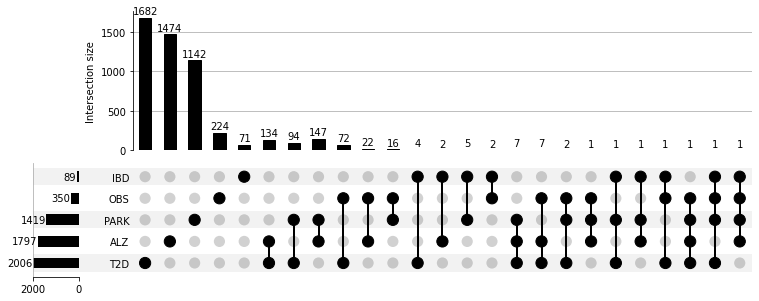

In [61]:
all_elems = set1.union(set2).union(set3).union(set4).union(set5)
df_new = pd.DataFrame([[e in set1, e in set2, e in set3, e in set4, e in set5] for e in all_elems], columns = set_names)
df_up = df_new.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts = True)

In [4]:
ob_T = pd.read_csv("E:\Transcriptomics\Obesity\FINAL-transcripts/all the gse.csv")
t2d_T = pd.read_csv("E:\Transcriptomics\T2D\Final-transcripts/both the GSE.csv")

In [16]:
merged_ob_t2d = ob_T.merge(t2d_T, on="Gene.symbol", how="inner").drop_duplicates('Gene.symbol')
df = merged_ob_t2d[["Gene.symbol", "baseMean_x", "baseMean_y"]].dropna()
df

,Gene.symbol,baseMean_x,baseMean_y
0,MTRNR2L8,4410.20,48.85
1,NR4A2,2583.73,598.12
2,ATF3,2984.78,653.81
3,HBEGF,619.10,248.16
4,ABHD13,512.64,453.31
5,EGR3,1060.53,240.81
6,LINC01088,38.52,27.62
7,DDX3X,6449.04,4745.26
8,LOC101928953,247.63,267.85
9,IL1B,273.36,113.30


Performing k-means cluster to identify useful clusters:

[[ 4410.2     48.85]
 [ 2583.73   598.12]
 [ 2984.78   653.81]
 [  619.1    248.16]
 [  512.64   453.31]
 [ 1060.53   240.81]
 [   38.52    27.62]
 [ 6449.04  4745.26]
 [  247.63   267.85]
 [  273.36   113.3 ]
 [  523.96   469.37]
 [ 1921.14  1463.44]
 [   39.7     42.04]
 [  115.08    34.92]
 [  281.99    99.74]
 [  148.15   162.56]
 [  118.29   126.27]
 [  657.49   682.98]
 [   43.76    49.8 ]
 [  203.18   236.47]
 [ 1838.22  1819.25]
 [  868.45   892.7 ]
 [  614.52   624.41]
 [  723.51   731.21]
 [ 1095.7   1163.4 ]
 [ 1023.61   161.18]
 [   23.54   178.05]
 [ 1077.49   900.31]
 [15160.05 14577.14]
 [  112.48   126.4 ]
 [   73.32    60.57]
 [  355.58   326.86]
 [ 1788.95  1919.69]
 [   43.64    51.13]
 [   19.98    24.26]
 [ 1301.99  1374.83]
 [ 1535.22  1517.45]
 [  547.28   568.62]
 [   81.81    71.49]
 [  610.     646.11]
 [   66.18    68.53]
 [ 3046.85  3063.  ]
 [ 4034.02  4043.78]
 [  390.53   332.17]
 [   87.3     86.74]
 [   59.81    65.9 ]
 [  743.74   810.29]
 [  248.34   

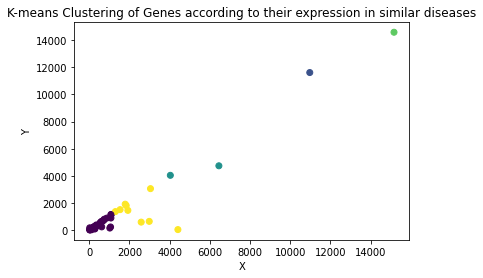

In [19]:
data = df.set_index('Gene.symbol').values
print(data)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
scaled_data = data

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(scaled_data)

print(cluster_assignments)
# Step 4: Visualization
# Scatter plot of the first two principal components (for visualization)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_assignments, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering of Genes according to their expression in similar diseases')
plt.show()